In [1]:
using Plots
using LinearAlgebra
using Distributions

In [254]:
# state transitions 
function update_states_log(log_x,r,d)
    return log(r) + log_x +rand(d,1)[1]
end
    
# belief update
function sigma(sigma, sigma_nu)
    return  sigma + sigma_nu
end 
    
function mu(log_x_hat, r)
    return log_x_hat + log(r) 
end     

# bayesian update
function sample(log_x,d_sample)
    return exp(log_x + rand(d_sample, 1)[1])
end 

function sigma_prime(sigma, sigma_omega)
    return sqrt((1/sigma^2 + 1/sigma_omega^2)^(-1))
end 
    
function mu_prime(log_x_hat, sigma, O_t, sigma_omega)
    return sigma_prime(sigma, sigma_omega)^2*(log_x_hat/sigma^2+log(O_t)/sigma_omega^2)
end 
      
function Z(log_x_hat, sigma, O_t, sigma_omega)
    x = (log_x_hat^2/sigma^2 + log(O_t)^2/sigma_omega^2) - (1/sigma^2+1/sigma_omega^2)^(-1)*(log_x_hat/sigma^2 + log(O_t)/sigma_omega^2)^2
    return exp(-0.5*x)
end 
    
function p(p, log_x_hat0, log_x_hat1, sigma_nu, O_t, sigma_omega)
    Z_0 = Z(log_x_hat0, sigma_nu, O_t, sigma_omega) 
    Z_1 = Z(log_x_hat1, sigma_nu, O_t, sigma_omega) 
    return p*Z_0/(p*Z_0 + (1-p)*Z_1)
end 

p (generic function with 1 method)

In [282]:
# paramters
sigma_nu = 0.1
sigma_omega = 0.6
r0 = 1.1
r1 = 0.9
r = 0.9
d = Distributions.Normal(0, sigma_nu)
d_sample = Distributions.Normal(0, sigma_omega)
# states
log_x_t = log(0.5)
log_x_t_hat0 = log_x_t
log_x_t_hat1 = log_x_t
sigma_t = 1.0
p_t = 0.5

0.5

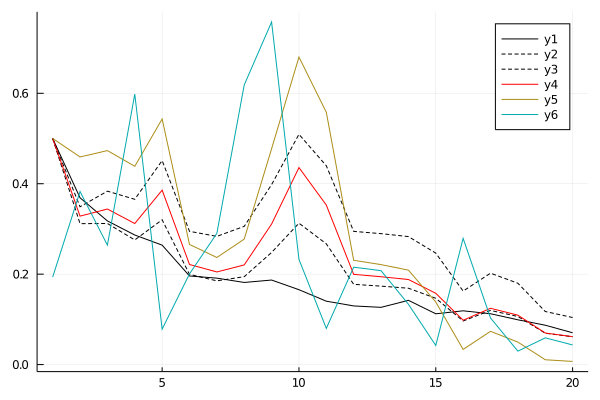

In [283]:
N = 20
x_t = zeros(N)
x_t_hat0 = zeros(N)
x_t_hat1 = zeros(N)
x_t_mean = zeros(N)
p_t_ls = zeros(N)
sigma_t_ls = zeros(N)
O_t_ls = zeros(N)
for i in 1:N
    # save values 
    x_t[i] = exp(log_x_t)
    x_t_hat0[i] = exp(log_x_t_hat0)
    x_t_hat1[i] = exp(log_x_t_hat1)
    x_t_mean[i] = exp(p_t*log_x_t_hat0 + (1-p_t)*log_x_t_hat1)
    p_t_ls[i] = p_t
    sigma_t_ls[i] = sigma_t
    # update state
    log_x_t = update_states_log(log_x_t,r,d)
    # update beleifs
    sigma_t = sigma(sigma_t, sigma_nu)
    log_x_t_hat0 = mu(log_x_t_hat0, r0)
    log_x_t_hat1 = mu(log_x_t_hat1, r1)
    # make observaiton 
    O_t = sample(log_x_t,d_sample)
    sigma_t = sigma_prime(sigma_t, sigma_omega)
    log_x_t_hat0 = mu_prime(log_x_t_hat0, sigma_t, O_t, sigma_omega)
    log_x_t_hat1 = mu_prime(log_x_t_hat1, sigma_t, O_t, sigma_omega)
    p_t = p(p_t, log_x_t_hat0, log_x_t_hat1, sigma_nu, O_t, sigma_omega)
    O_t_ls[i] = O_t
end 
Plots.plot(x_t, color = "black")
Plots.plot!(x_t_hat0, color = "black", linestyle=:dash)
Plots.plot!(x_t_hat1, color = "black", linestyle=:dash)
Plots.plot!(x_t_mean, color = "red")
Plots.plot!(p_t_ls)
Plots.plot!(O_t_ls)

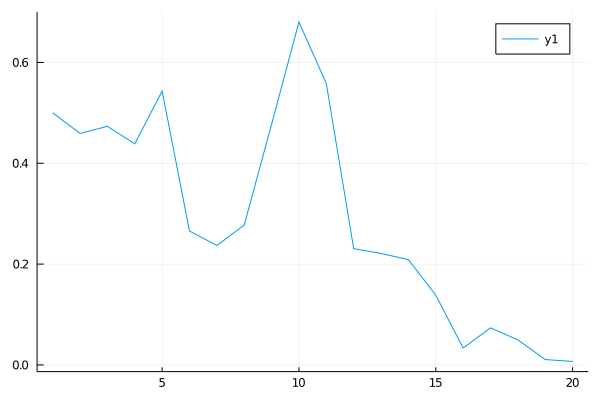

In [284]:
Plots.plot(p_t_ls)

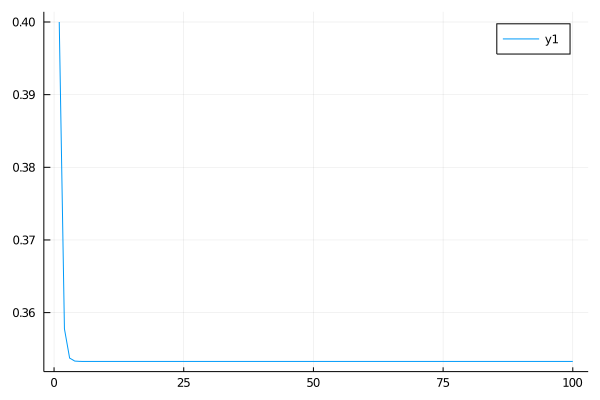

In [162]:
Plots.plot(sigma_t_ls)